# k-means
### Dataset: [A3-data.txt](../../input/A3-data.txt)

<a id="1"></a>
## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

<a id="2"></a>
## Loading dataset

In [2]:
filename = '../../input/A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

features = ['x', 'y', 'z', 't']
target = ['class']

X = df[features]

print(X.describe())

y = df[target]


            x         y         z         t  class
0   -0.031676 -9.912054 -0.579436 -1.044239      1
1    0.002526  6.172456  3.288339 -1.006427      5
2    0.183123 -0.387841  6.236470 -1.691491      2
3   -0.042262 -1.996272 -1.655302 -2.995311      1
4   -0.062811 -0.417072  6.657475 -3.633134      4
..        ...       ...       ...       ...    ...
355 -0.340733  8.504536  7.903644 -2.032197      6
356 -0.024928  1.551977  6.361992 -0.757714      2
357 -0.668529 -0.607597  0.639295  4.329213      6
358 -0.122711 -5.516957 -2.111173  2.209675      3
359  0.740207 -7.492176  1.959426 -7.119918      6

[360 rows x 5 columns]
                x           y           z           t
count  360.000000  360.000000  360.000000  360.000000
mean     0.030880    0.685121    3.973543   -0.318865
std      0.377520    4.900030    4.050409    3.321348
min     -0.819698   -9.912054   -4.573732   -7.954909
25%     -0.140746   -2.033918    0.610788   -2.694196
50%      0.002011    0.214840    4.98897

In [3]:
fig = px.scatter_matrix(df, dimensions=['x', 'y', 'z', 't'], color='class')
fig.show()

<a id="3"></a>
## Standardize the data

In [4]:
# standardizing the features
X_norm = StandardScaler().fit_transform(X)

print(X_norm)

[[-0.16593253 -2.16568552 -1.12564329 -0.21870125]
 [-0.0752113   1.12141602 -0.16940458 -0.20730108]
 [ 0.4038321  -0.2192752   0.55946837 -0.41384888]
 ...
 [-1.85521782 -0.26418564 -0.82433373  1.40140325]
 [-0.4074083  -1.26748402 -1.5043379   0.7623589 ]
 [ 1.88152582 -1.67114864 -0.49795468 -2.05052832]]


<a id="4"></a>
## Get the K value

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

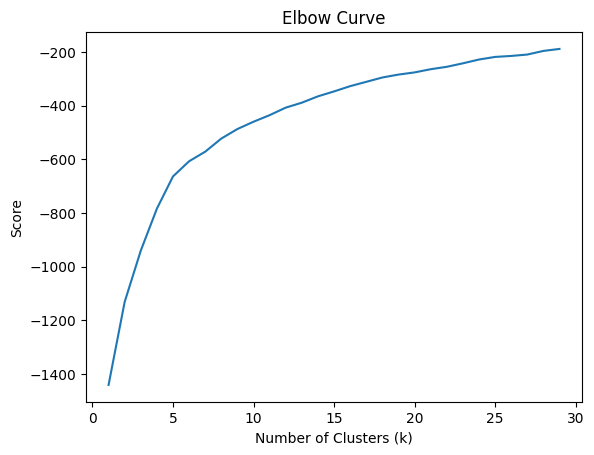

In [5]:
nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
score = [kmeans[i].fit(X_norm).score(X_norm) for i in range(len(kmeans))]
score
plt.plot(nc,score)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

<a id="5"></a>
## K-means execution

In [6]:
n_classes =  np.unique(y).size

kmeans = KMeans(n_clusters=n_classes, init="random", n_init=10, max_iter=300, algorithm = 'auto')
kmeans.fit(X_norm)

centroids = kmeans.cluster_centers_
print(centroids)

df['KMeans_clusters'] = kmeans.labels_
df.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1420: FutureWarning:

algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



[[-0.86475594 -0.22552717  0.73849186 -0.2551616 ]
 [-0.37791829 -0.22217418 -1.41585212 -1.00772255]
 [-0.00643014  1.38300788 -0.22330606  0.37151354]
 [-0.31805151 -1.06510508 -0.87543614  1.20104641]
 [ 1.06329852 -0.21923199  0.56487353  0.31751061]
 [ 0.83878535  0.19134771  0.82947735 -1.35512425]]


,x,y,z,t,class,KMeans_clusters
0,-0.031676,-9.912054,-0.579436,-1.044239,1,3
1,0.002526,6.172456,3.288339,-1.006427,5,2
2,0.183123,-0.387841,6.236470,-1.691491,2,4
3,-0.042262,-1.996272,-1.655302,-2.995311,1,1
4,-0.062811,-0.417072,6.657475,-3.633134,4,0


<a id="6"></a>
## Visualize 2D Projection

[1 5 2 1 4 1 5 6 5 6 2 1 1 2 2 2 2 4 6 2 1 6 2 4 6 1 6 6 6 6 3 6 5 2 6 4 2
 4 4 1 4 6 2 6 4 2 4 5 5 4 6 2 2 6 5 5 2 1 3 1 6 1 1 1 2 3 2 6 2 4 2 6 6 6
 2 1 2 5 6 6 6 4 5 1 6 6 5 2 2 5 3 6 5 1 2 1 6 4 2 2 1 4 1 6 2 6 6 1 2 5 2
 2 5 1 2 6 2 5 6 6 2 5 2 2 6 6 2 4 1 1 5 6 6 2 1 4 4 2 2 5 4 2 6 6 2 1 6 5
 3 6 2 6 1 1 1 3 6 6 5 3 1 6 6 3 1 1 5 6 1 1 2 6 1 4 2 6 6 6 5 6 2 2 1 2 3
 2 1 2 6 2 1 6 2 5 1 1 6 2 4 4 6 1 4 4 5 6 1 1 3 6 2 1 2 6 6 2 4 1 6 4 2 4
 2 2 1 2 3 3 5 4 6 2 4 6 6 1 3 2 2 2 6 2 6 1 6 2 2 2 2 2 2 4 4 4 2 6 2 3 1
 1 3 2 4 4 6 6 1 2 2 2 3 4 3 2 2 6 1 2 6 6 2 5 6 4 5 6 1 3 5 3 4 5 1 6 6 5
 1 6 6 1 6 6 6 1 6 6 2 6 2 6 1 1 1 4 6 2 5 2 2 1 1 2 6 4 2 6 2 6 4 5 5 6 6
 2 2 2 6 2 6 3 2 5 2 2 2 6 1 5 4 1 2 6 6 2 2 6 2 6 3 6]


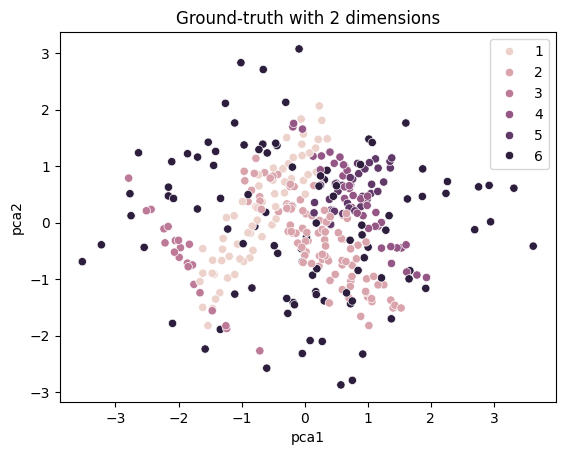

[3 2 4 1 0 2 2 4 2 1 4 3 3 4 4 4 4 0 3 4 1 4 0 0 3 2 3 3 4 1 3 1 2 4 4 0 0
 5 5 3 0 0 0 0 0 0 5 2 2 0 2 4 0 2 2 2 4 3 3 1 5 1 1 1 0 3 4 2 4 0 4 1 2 3
 0 1 4 2 1 0 5 5 2 2 5 5 2 0 4 2 3 5 2 3 4 3 5 0 0 4 2 5 3 1 0 3 2 1 4 2 0
 0 2 2 0 3 0 2 5 2 0 2 0 0 3 2 0 5 2 2 2 2 1 0 1 5 0 4 0 2 5 0 2 2 4 2 5 2
 3 4 4 1 1 3 2 3 2 4 2 3 3 4 4 3 3 3 2 4 3 1 0 4 1 0 4 0 1 4 2 4 4 0 2 4 4
 4 1 4 2 0 1 2 0 2 1 1 5 4 0 5 1 1 5 5 2 2 2 1 3 2 4 1 0 4 0 0 0 1 3 0 0 5
 0 0 1 4 3 3 2 5 4 4 0 4 2 3 3 0 0 0 1 0 5 3 4 4 4 0 4 0 4 0 0 5 4 1 4 3 3
 1 3 0 5 5 3 3 1 0 4 4 3 0 3 4 4 0 3 0 2 4 0 2 5 5 2 3 2 3 2 3 5 2 2 1 0 2
 3 1 0 1 4 5 4 3 1 5 4 1 4 5 3 1 3 0 5 0 2 0 0 3 2 4 1 5 0 0 0 4 0 2 2 2 4
 4 0 0 4 4 1 3 0 2 0 0 4 1 1 2 5 3 4 1 2 0 4 2 0 3 3 5]


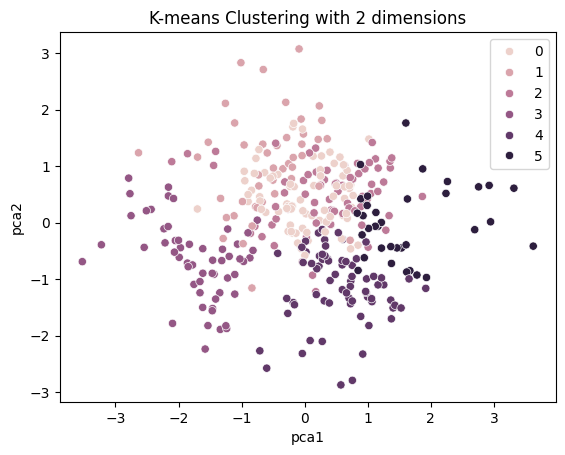

In [7]:
reduced_data = PCA(n_components=2).fit_transform(X_norm)
results = pd.DataFrame(data=reduced_data, columns=['pca1','pca2'])

print(y.values.flatten())

sb.scatterplot(x="pca1", y="pca2", hue=y.values.flatten(), data=results)
plt.title('Ground-truth with 2 dimensions')
plt.show()

print(kmeans.labels_)

sb.scatterplot(x="pca1", y="pca2", hue=kmeans.labels_, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()